In [2]:
import scanpy as sc
import os

import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import matplotlib as mp
from adjustText import adjust_text
from matplotlib.colors import LogNorm

In [3]:
from utils import plot_cells_pseudotime

In [4]:
data_path = '/data/ceph/hdd/project/node_08/QNA/scborzoi/submission_data'

## Panel B

In [5]:
ad_outputs = sc.read(os.path.join(data_path, 'count_eval', 'test_val_genes.h5ad')) 

In [6]:
adata = sc.read(os.path.join(data_path,  'bmmc_multiome_multivi_neurips21_curated_new_palantir_fixed_GEX.h5ad'))

In [7]:
sc.pp.normalize_total(ad_outputs, key_added='size_factor')

### Order cell types

In [8]:
old_order = ad_outputs.obs['l2_cell_type']

In [9]:
new_order= [
    "HSC",  
    'MK/E prog', 
    'Proerythroblast', 
    'Erythroblast', 
    'Normoblast', 
    'G/M prog', 
    'CD14+ Mono',
    'CD16+ Mono',  
    'Early Lymphoid',
    'Transitional B', 
    'Naive CD20+ B', 
    'B1 B',  
    'CD4+ T naive',
    'CD8+ T naive', 
    'CD4+ T activated',
    'CD8+ T activated',
    'NK',
    'ILC', 
    'Plasma',
    'cDC2',
    'pDC']

In [10]:
ad_outputs.obs['l2_cell_type'] = pd.Categorical(ad_outputs.obs['l2_cell_type'], categories = new_order, ordered = True)
ad_outputs = ad_outputs[ad_outputs.obs.sort_values('l2_cell_type').index, :]

In [11]:
adata.obs['l2_cell_type'] = pd.Categorical(adata.obs['l2_cell_type'], categories = new_order, ordered = True)
adata = adata[adata.obs.sort_values('l2_cell_type').index, :]

In [12]:
# Get the index mapping from the original to the reordered categories
indexer = old_order.cat.categories.get_indexer(ad_outputs.obs['l2_cell_type'].cat.categories)

### Heatmap

In [13]:
ad_outputs.obs['l2_cell_type'] = pd.Categorical(ad_outputs.obs['l2_cell_type'], categories = new_order, ordered = True)
ad_outputs = ad_outputs[ad_outputs.obs.sort_values('l2_cell_type').index, :]

/scratch/tmp/martensl/ipykernel_1158406/1301471573.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad_outputs.obs['l2_cell_type'] = pd.Categorical(ad_outputs.obs['l2_cell_type'], categories = new_order, ordered = True)


In [14]:
adata.obs['l2_cell_type'] = pd.Categorical(adata.obs['l2_cell_type'], categories = new_order, ordered = True)
adata = adata[adata.obs.sort_values('l2_cell_type').index, :]

/scratch/tmp/martensl/ipykernel_1158406/130172632.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['l2_cell_type'] = pd.Categorical(adata.obs['l2_cell_type'], categories = new_order, ordered = True)


In [15]:
new_cell_marker_genes = ["GATA2", "MEIS1","AUTS2", "DIAPH3", "ANK1",  "SLC25A37",  "LYN", "FCN1","CST3",   "OSBPL10",   "BLK", "BCL2","AFF3",  "IGKC", "THEMIS",'CD7',  "GNLY",'CEBPD'] 

In [16]:
val_genes = pd.read_csv(os.path.join(data_path, 'count_eval', 'val_genes.csv'), index_col=0)
test_genes = pd.read_csv(os.path.join(data_path, 'count_eval', 'test_genes.csv'), index_col=0)

In [17]:
ad_outputs.uns['l2_cell_type_colors'] = adata.uns['l2_cell_type_colors']

/scratch/tmp/martensl/ipykernel_1158406/675888315.py:1: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  ad_outputs.uns['l2_cell_type_colors'] = adata.uns['l2_cell_type_colors']


In [18]:
ad_outputs.uns['l2_cell_type_colors'] =  np.array(ad_outputs.uns['l2_cell_type_colors'])[indexer.tolist()].tolist()

/scratch/tmp/martensl/ipykernel_1158406/4125819145.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratch/tmp/martensl/ipykernel_1158406/4125819145.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


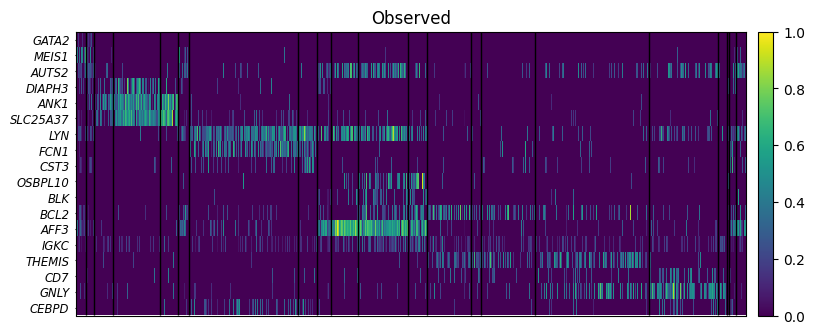

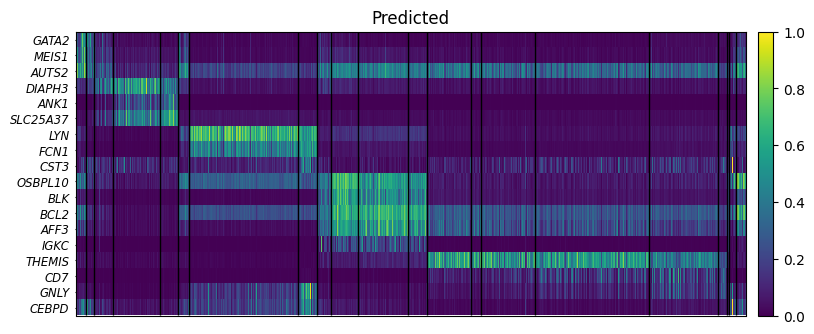

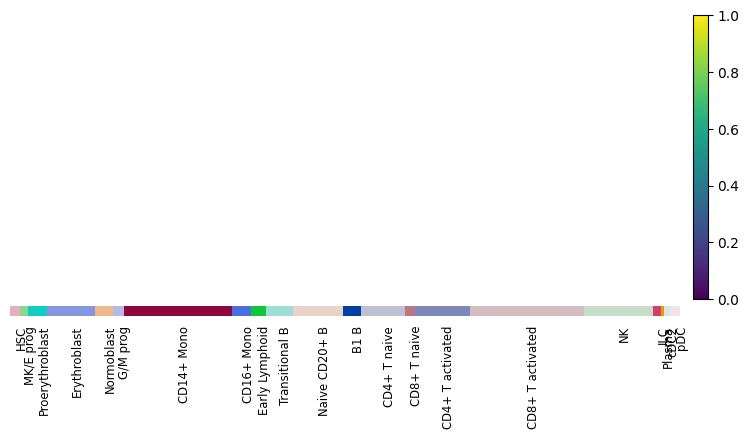

In [19]:
ax = sc.pl.heatmap(adata, new_cell_marker_genes, groupby= ['l2_cell_type'], swap_axes = True, show=False, figsize = (9,4), cmap='viridis', standard_scale = 'var', show_gene_labels=True) 
ax['heatmap_ax'].set_title('Observed')
ax['groupby_ax'].remove()
xticklabels = ax['heatmap_ax'].get_yticklabels()  

for label in xticklabels:
    label.set_fontstyle('italic')

plt.tight_layout()
plt.savefig('../figures/Figure2/heatmap_observed.svg', bbox_inches='tight', dpi=300)

ax = sc.pl.heatmap(ad_outputs, new_cell_marker_genes, groupby= 'l2_cell_type', swap_axes = True, show = False, figsize = (9,4), cmap='viridis', standard_scale="var", show_gene_labels=True) 
ax['heatmap_ax'].set_title('Predicted')
ax['groupby_ax'].remove()
xticklabels = ax['heatmap_ax'].get_yticklabels()  

for label in xticklabels:
    label.set_fontstyle('italic')
plt.tight_layout()
plt.savefig('../figures/Figure2/heatmap_predicted.svg', bbox_inches='tight', dpi=300)

ax = sc.pl.heatmap(ad_outputs, new_cell_marker_genes, groupby= 'l2_cell_type', swap_axes = True, show = False, figsize = (9,4), cmap='viridis', standard_scale="var", show_gene_labels=True) 
ax['heatmap_ax'].remove()
ax['groupby_ax'].set_xlabel("")
plt.setp(ax['groupby_ax'].get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor");
plt.savefig('../figures/Figure2/colorbar.svg', bbox_inches='tight', dpi=300)

### Evaluation across gene

In [110]:
cell_type_index = pd.read_parquet(os.path.join(data_path,  'scooby_training_data', 'celltype_fixed.pq'))
cell_type_index['size'] = cell_type_index['cellindex'].apply(lambda x: len(x))

In [111]:
cell_type_index['celltype'] = cell_type_index['celltype'].str.replace(' ', '_').replace(r"G/M_prog", "G+M_prog").replace("MK/E_prog", "MK+E_prog") #+ '_filtered'
cell_type_index = cell_type_index.sort_values('celltype')

In [22]:
all_outputs = torch.load(os.path.join(data_path, 'count_eval', 'count_predicted_test_no_neighbor.pq'))
all_targets = torch.load(os.path.join(data_path, 'count_eval', 'count_target_test_no_neighbor.pq'))

/scratch/tmp/martensl/ipykernel_1158406/979206402.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_outputs = torch.load(os.path.join(data_path, 'count_eval', 'count_p

In [23]:
gene_names = pd.read_parquet(os.path.join(data_path, "count_eval", "gene_names.pq"))[0].tolist()

In [24]:
spearmanr = [
    scipy.stats.spearmanr(np.log2(all_outputs[:, i] + 1), 
                          np.log2(all_targets[:, i] + 1))[0] for i in range(all_outputs.shape[1])
]
pearsonr =  [
    scipy.stats.pearsonr (np.log2(all_outputs[:, i] + 1), 
                          np.log2(all_targets[:, i] + 1))[0] for i in range(all_outputs.shape[1])]

In [25]:
font_size=  12
mp.rcParams['axes.labelsize'] = font_size
mp.rcParams['axes.titlesize'] = font_size
mp.rcParams['legend.fontsize'] = font_size
mp.rcParams['xtick.labelsize'] = font_size
mp.rcParams['ytick.labelsize'] = font_size

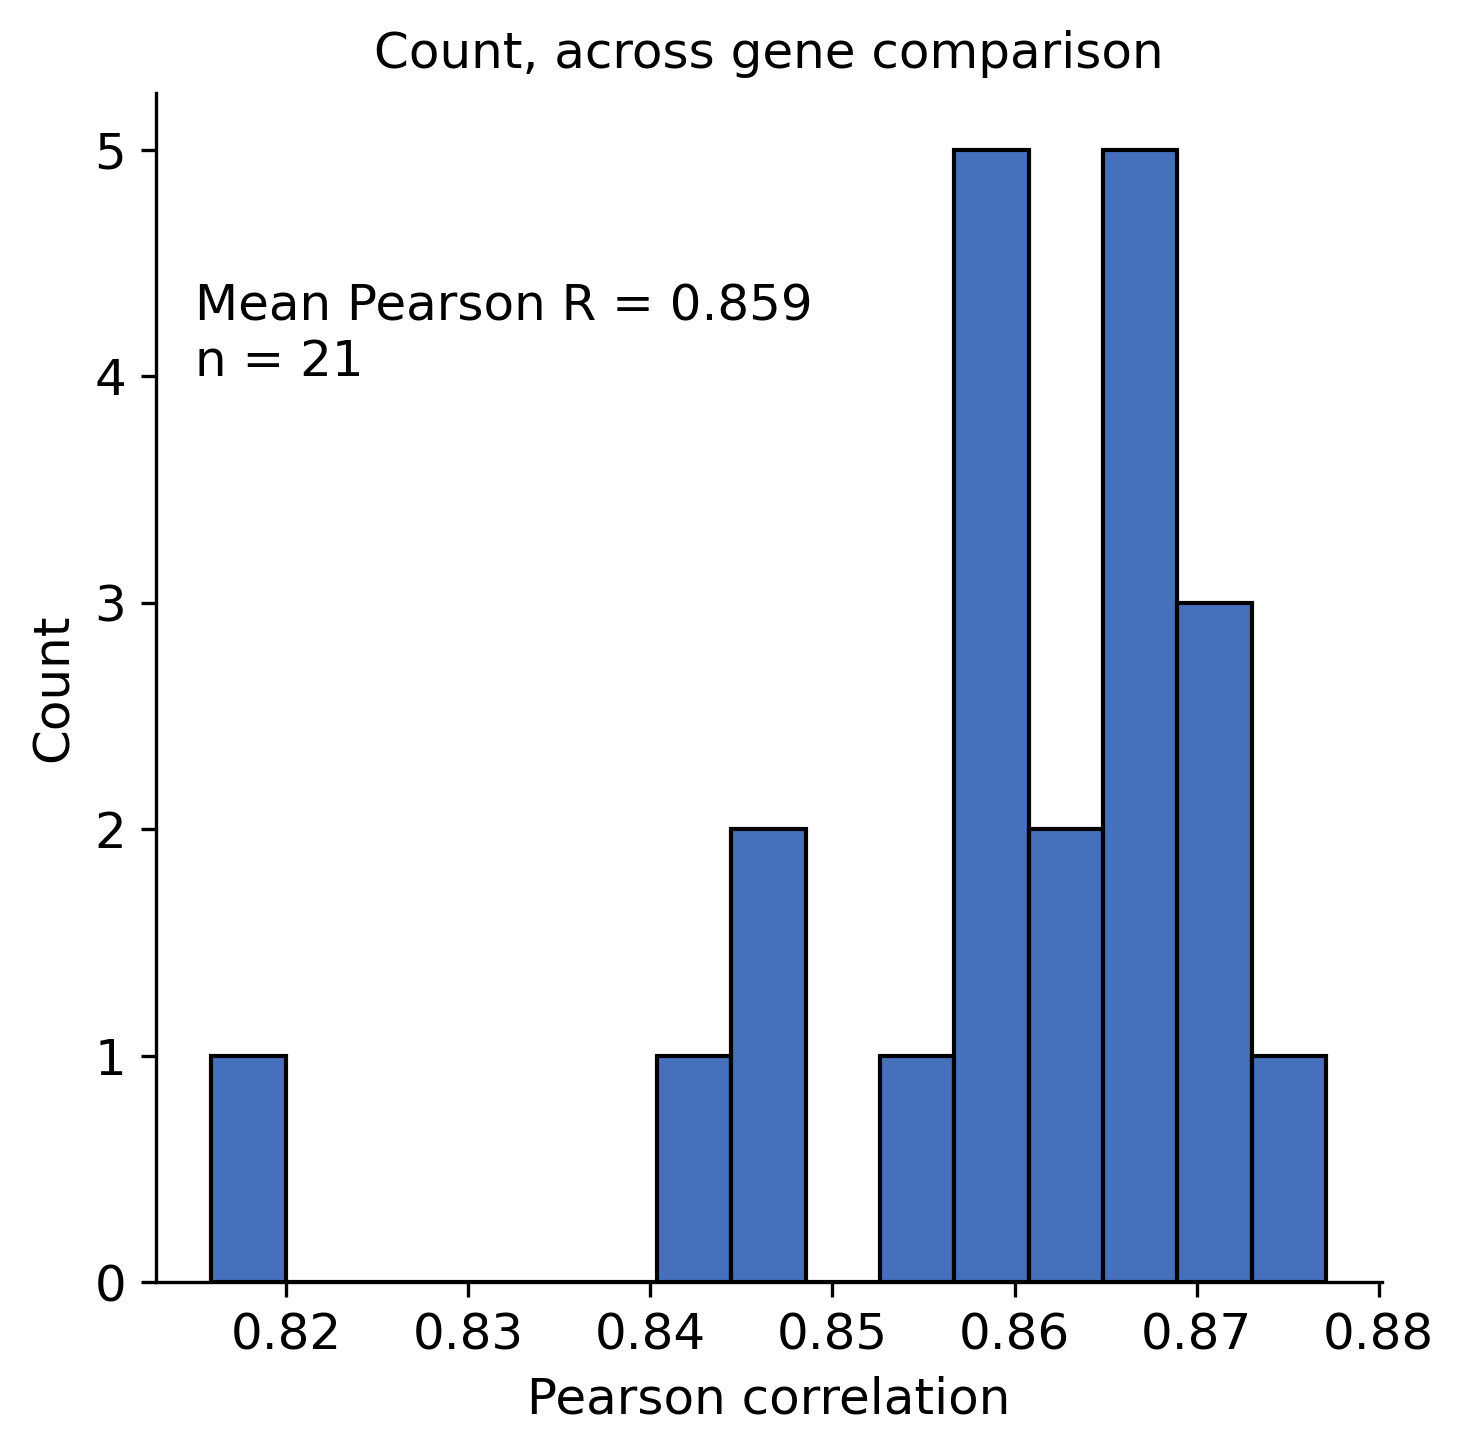

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.histplot(pearsonr, bins = 15, color='#0742A6')
ax.set_xlabel('Pearson correlation')
ax.set_title('Count, across gene comparison')
ax.text(0.815,4, "Mean " + r"Pearson R"+ f" = {np.mean(pearsonr):.3f} \nn = {len(pearsonr)}", bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'), fontdict={'size' : 12})
plt.tight_layout()
sns.despine()
fig.set_dpi(300)
fig.savefig('../figures/Figure2/across_gene_histogram.svg')

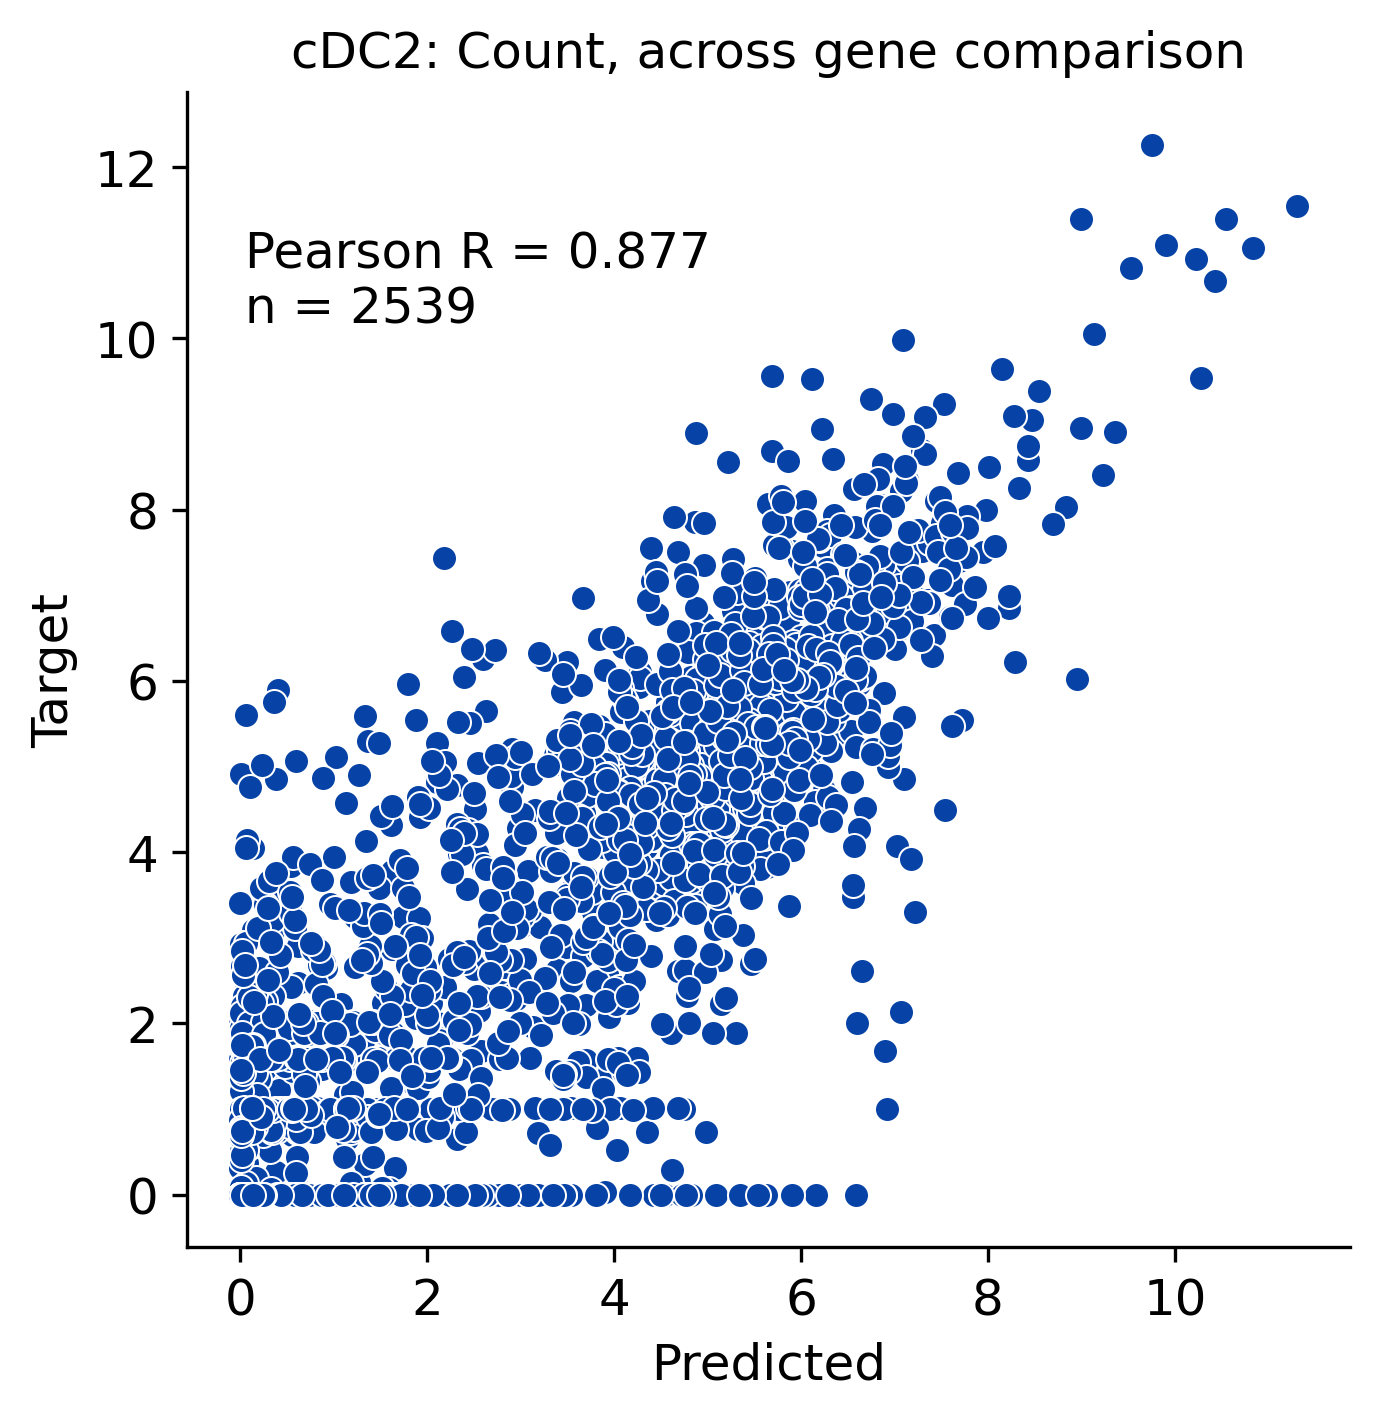

In [28]:
track = -2
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x=np.log2((all_outputs[:, track]+1)), y=np.log2(all_targets[:, track]+1), color='#0742A6', ax=ax)
ax.text(0.05,0.8, r"Pearson R"+ f" = {pearsonr[track]:.3f}\nn = {len(all_outputs[:, track])}", 
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'), fontdict={'size' : 12},
        transform = ax.transAxes
)
plt.xlabel('Predicted')
plt.ylabel('Target')
sns.despine()
ct = cell_type_index.iloc[track]['celltype']
ax.set_title(f'{ct}: Count, across gene comparison')
fig.set_dpi(300)
fig.savefig('../figures/Figure2/cDC2_scatterplot.svg')

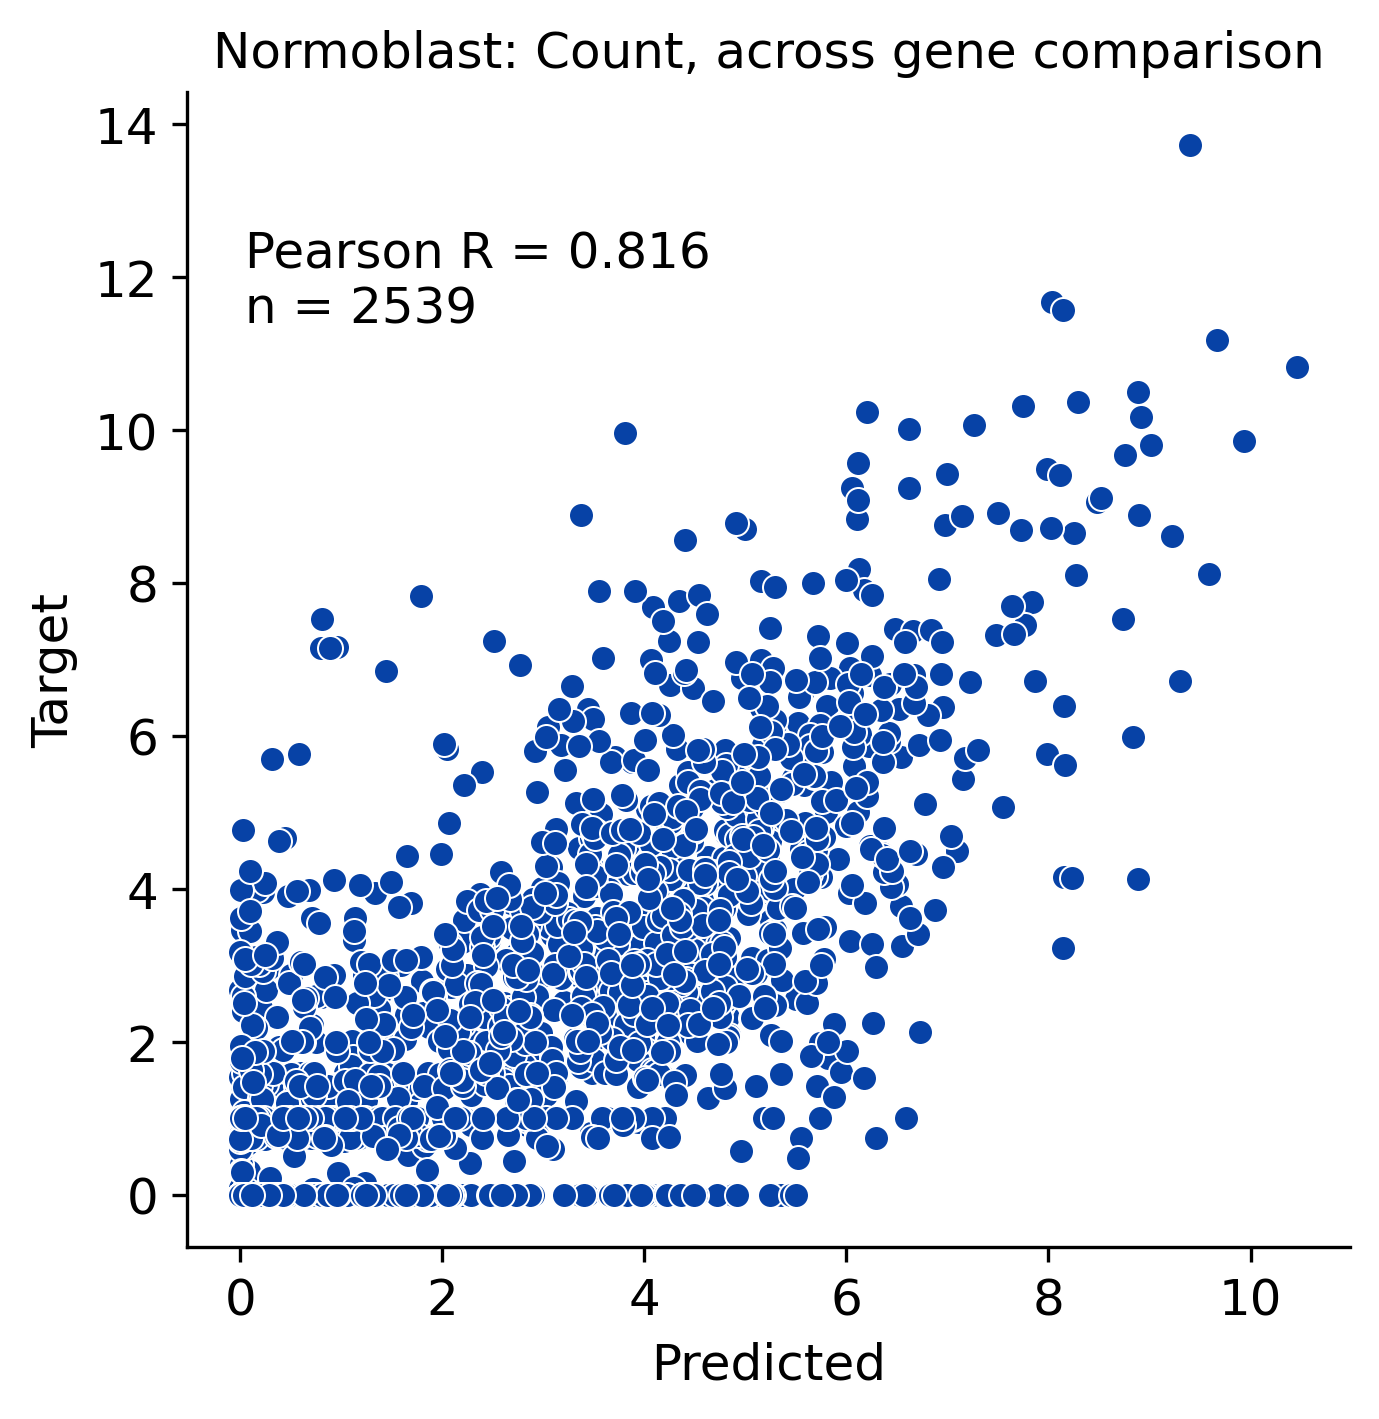

In [29]:
track = 15
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x=np.log2((all_outputs[:, track]+1)), y=np.log2(all_targets[:, track]+1), color='#0742A6', ax=ax)
ax.text(0.05,0.8, r"Pearson R"+ f" = {pearsonr[track]:.3f}\nn = {len(all_outputs[:, track])}", 
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'), fontdict={'size' : 12},
        transform = ax.transAxes
)
plt.xlabel('Predicted')
plt.ylabel('Target')
sns.despine()
ct = cell_type_index.iloc[track]['celltype']
ax.set_title(f'{ct}: Count, across gene comparison')
fig.set_dpi(300)
fig.savefig(f'../figures/Figure2/{ct}_scatterplot.svg')

### Evaluation across cells

In [30]:
# log2(x+1)
counts_predicted_log = np.log2(pd.DataFrame(all_outputs) + 1)  
# substract mean per gene across all cell types
counts_predicted_log = counts_predicted_log - counts_predicted_log.mean(axis=0)

#substract mean per cell type across all genes
counts_predicted_log = counts_predicted_log.subtract(counts_predicted_log.mean(axis=1), axis=0)

In [31]:
counts_target_log =np.log2(pd.DataFrame(all_targets) + 1)
counts_target_log = counts_target_log - counts_target_log.mean(axis=0)

counts_target_log = counts_target_log.subtract(counts_target_log.mean(axis=1), axis=0)

In [32]:
counts_predicted_log.index = gene_names
counts_predicted_log.columns = cell_type_index['celltype']

In [33]:
counts_target_log.index = gene_names
counts_target_log.columns = cell_type_index['celltype']

0    CD7
Name: NK, dtype: object
0    ANK1
Name: Normoblast, dtype: object


/scratch/tmp/martensl/ipykernel_1158406/1074425427.py:28: UserWarning: Adding colorbar to a different Figure <Figure size 1500x1500 with 1 Axes> than <Figure size 1500x1500 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(g, ax=ax)


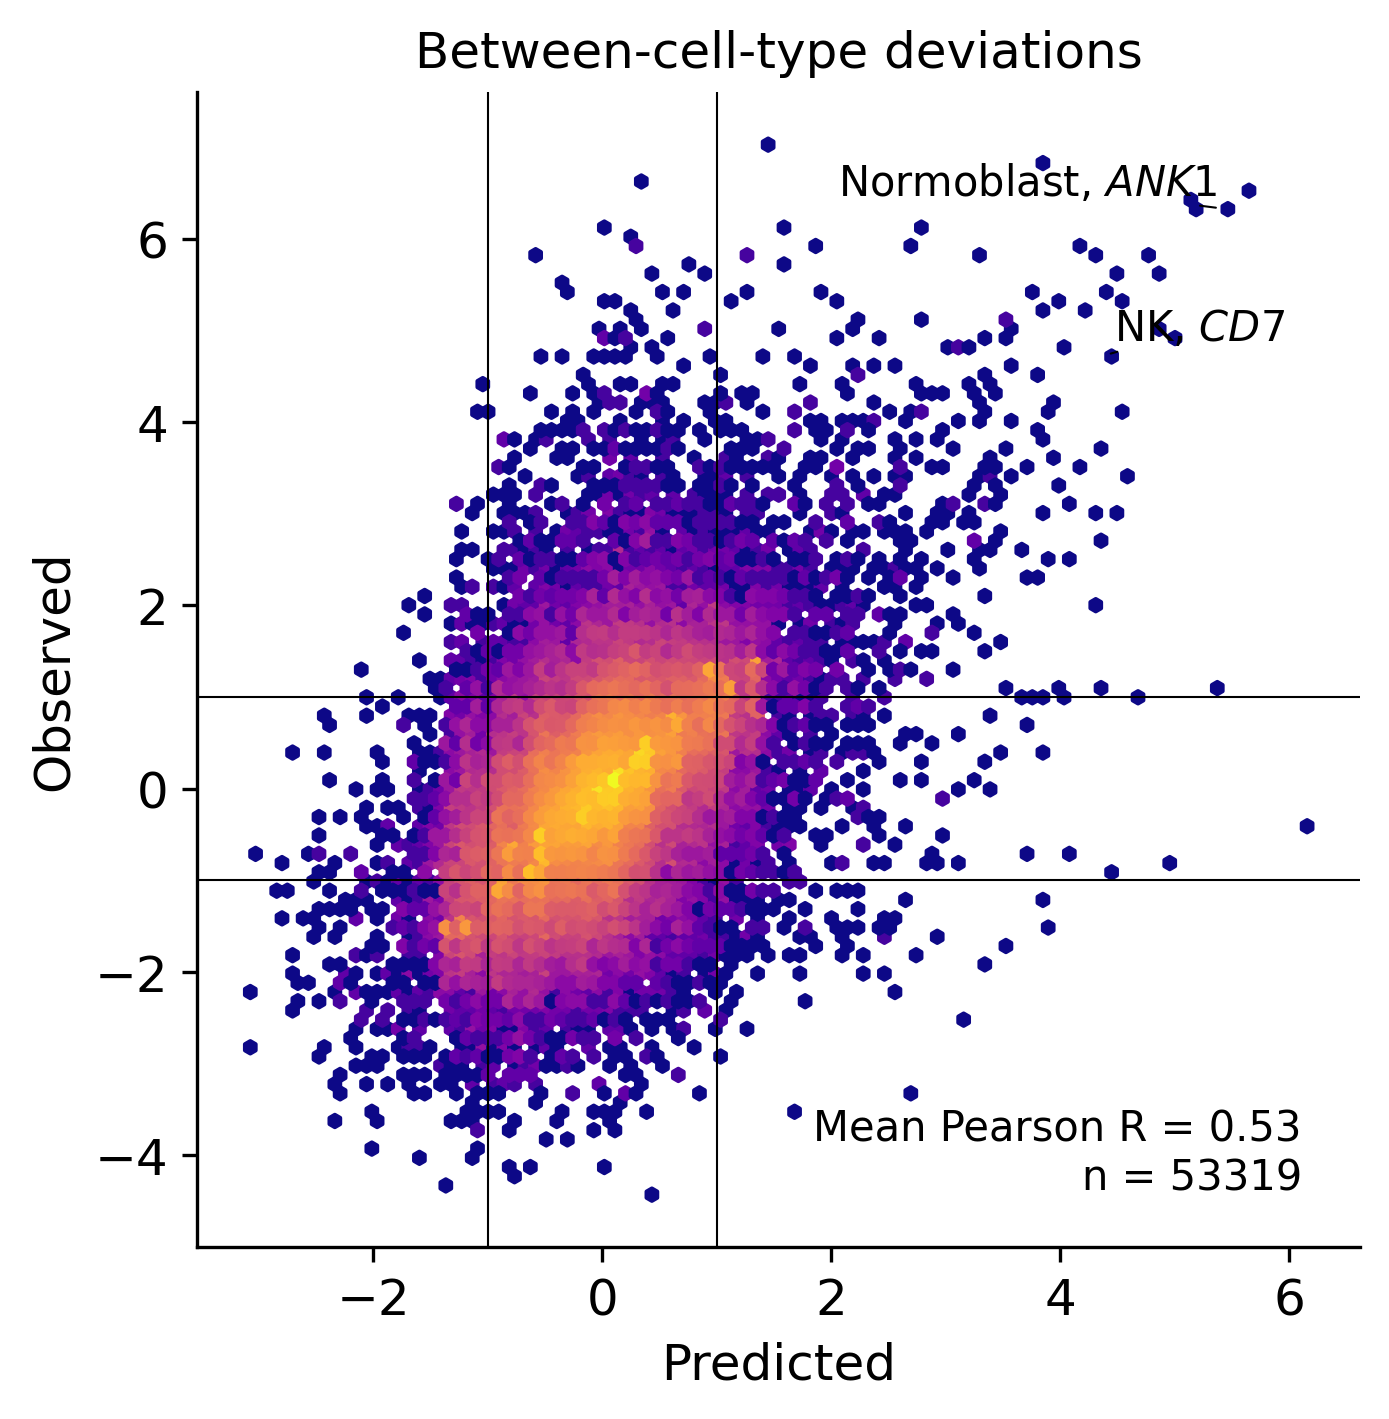

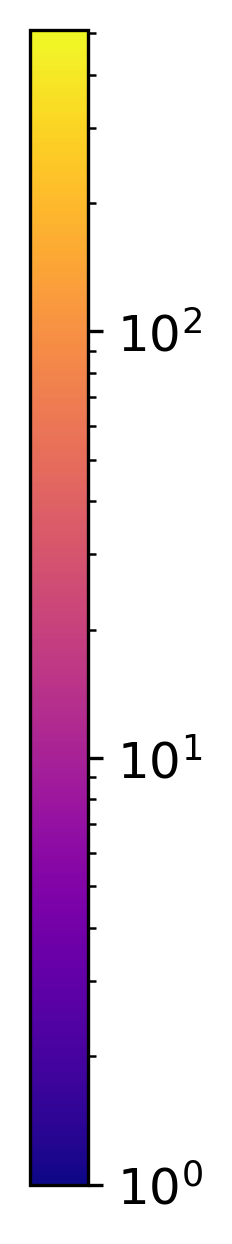

In [34]:

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
g=ax.hexbin(x=counts_predicted_log.values.ravel(), y=counts_target_log.values.ravel(), mincnt=1, cmap='plasma', norm=LogNorm())
ax.axvline(1, c='k', linewidth = font_size/24)
ax.axvline(-1,c='k', linewidth = font_size/24)
ax.axhline(1,c='k', linewidth = font_size/24)
ax.axhline(-1,c='k', linewidth = font_size/24)


p=scipy.stats.pearsonr(counts_predicted_log.values.ravel(), counts_target_log.values.ravel())[0]
plt.text(0.95,0.05, "Mean " + r"Pearson R"+ f" = {p:.2f}\nn = {len(counts_predicted_log.values.ravel())}", fontdict={'size' : 10}, transform=ax.transAxes, ha='right')
text = []
for ct, gene in counts_predicted_log.idxmax().to_frame().iterrows():
    if ct in ['Normoblast', 'NK']:
        name = ct.replace("_", " ")
        print(gene)
        text.append(ax.text(counts_predicted_log.loc[gene, ct].item(), y=counts_target_log.loc[gene, ct].item(), s=f"{name}, "+ "$\it{" + f"{gene.item()}" + "}$"))
adjust_text(text, 
            arrowprops=dict(arrowstyle='-', color='k', lw = 0.5) 
            );

ax.set_ylabel('Observed')
ax.set_title('Between-cell-type deviations')
ax.set_xlabel('Predicted')
sns.despine()
fig.savefig('../figures/Figure2/across_cells.svg')

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
fig.colorbar(g, ax=ax)
fig.axes[0].remove()
fig.savefig('../figures/Figure2/across_cells_colorbar.svg')

### Unseen cell type

In [117]:
all_outputs = torch.load(os.path.join(data_path, "count_eval", "count_predicted_test_no_normoblast.pq"))

/scratch/tmp/martensl/ipykernel_1158406/4178128540.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_outputs = torch.load(os.path.join(data_path, "count_eval", "count_

In [118]:
all_targets = torch.load(os.path.join(data_path, "count_eval", "count_target_test_no_normoblast.pq"))

/scratch/tmp/martensl/ipykernel_1158406/4200992171.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_targets = torch.load(os.path.join(data_path, "count_eval", "count_

In [119]:
counts_predicted_log = np.log2(all_outputs + 1)
counts_target_log = np.log2(
    all_targets + 1)

In [120]:
counts_predicted_log.shape

(411, 21)

In [122]:
cell_type_index = cell_type_index.reset_index()

In [123]:
pearsons = []
for i, row in cell_type_index.iterrows():
    ct = row["celltype"]
    print (i,ct, scipy.stats.pearsonr(counts_predicted_log[:,i].ravel(), counts_target_log[:, 15])[0])
    pearsons.append(scipy.stats.pearsonr(counts_predicted_log[:,i].ravel(), counts_target_log[:, 15])[0])

cell_type_index['normoblast perf, pearson when_imputed with celltype pred'] = pearsons

0 B1_B 0.6391561696161043
1 CD14+_Mono 0.62956623363676
2 CD16+_Mono 0.6431816577556331
3 CD4+_T_activated 0.6526526680294367
4 CD4+_T_naive 0.6568972209919182
5 CD8+_T_activated 0.6489670123422564
6 CD8+_T_naive 0.667427339498256
7 Early_Lymphoid 0.6730953128913524
8 Erythroblast 0.7580647504661393
9 G+M_prog 0.6606364304557548
10 HSC 0.6701368020672324
11 ILC 0.6582457999166695
12 MK+E_prog 0.7125814325184591
13 NK 0.6452947518749047
14 Naive_CD20+_B 0.6449355250527316
15 Normoblast 0.7854087695341071
16 Plasma 0.652782012175464
17 Proerythroblast 0.7398389976921161
18 Transitional_B 0.66728025610371
19 cDC2 0.6497152046445102
20 pDC 0.6466308071698984


In [5]:
adata = sc.read(os.path.join(data_path, 'bmmc_multiome_multivi_neurips21_curated_new_palantir_fixed_GEX.h5ad'))

In [125]:
color_map = dict(zip(adata.obs.l2_cell_type.cat.categories, adata.uns['l2_cell_type_colors']))

In [126]:
cell_type_index['celltype'] = cell_type_index['celltype'].str.replace('_', ' ').replace(r"G+M prog", "G/M prog").replace("MK+E prog", "MK/E prog")

In [127]:
test = cell_type_index.set_index('celltype').join(pd.DataFrame.from_dict(color_map, orient= 'index').rename({0:'color'}, axis = 1)).reset_index().sort_values('normoblast perf, pearson when_imputed with celltype pred')

In [128]:
test

,celltype,index,cellindex,size,"normoblast perf, pearson when_imputed with celltype pred",color
1,CD14+ Mono,1,"[1, 11, 13, 19, 30, 38, 49, 50, 51, 58, 62, 64...",10338,0.629566,#8e063b
0,B1 B,4,"[5, 9, 20, 32, 112, 128, 151, 265, 294, 360, 3...",1747,0.639156,#023fa5
2,CD16+ Mono,3,"[4, 17, 94, 315, 329, 370, 698, 709, 928, 936,...",1762,0.643182,#4a6fe3
14,Naive CD20+ B,0,"[0, 21, 60, 73, 101, 129, 147, 155, 186, 194, ...",4758,0.644936,#ead3c6
13,NK,9,"[15, 22, 25, 29, 37, 65, 66, 74, 78, 102, 130,...",6560,0.645295,#c6dec7
20,pDC,16,"[113, 221, 264, 510, 662, 678, 759, 989, 995, ...",946,0.646631,#f3e1eb
5,CD8+ T activated,2,"[2, 3, 33, 35, 36, 41, 46, 67, 77, 84, 95, 103...",10846,0.648967,#d6bcc0
19,cDC2,19,"[479, 737, 787, 864, 1107, 1112, 1481, 1593, 1...",623,0.649715,#d5eae7
3,CD4+ T activated,7,"[8, 24, 28, 40, 45, 48, 55, 63, 68, 75, 76, 82...",5157,0.652653,#7d87b9
16,Plasma,17,"[249, 255, 351, 364, 532, 904, 1014, 1043, 147...",245,0.652782,#ef9708


/scratch/tmp/martensl/ipykernel_1158406/1657213253.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(test.rename({"normoblast perf, pearson when_imputed with celltype pred" : "Val set: Normoblast count pearson, when imputed with cell type", "celltype" : "Cell type"}, axis = 1),y="Cell type",x="Val set: Normoblast count pearson, when imputed with cell type", palette = test['color'].values, ax= ax)
/scratch/tmp/martensl/ipykernel_1158406/1657213253.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(test.rename({"normoblast perf, pearson when_imputed with celltype pred" : "Val set: Normoblast count pearson, when imputed with cell type", "celltype" : "Cell type"}, axis = 1),y="Cell type",x="Val set: Normoblast count pearson,

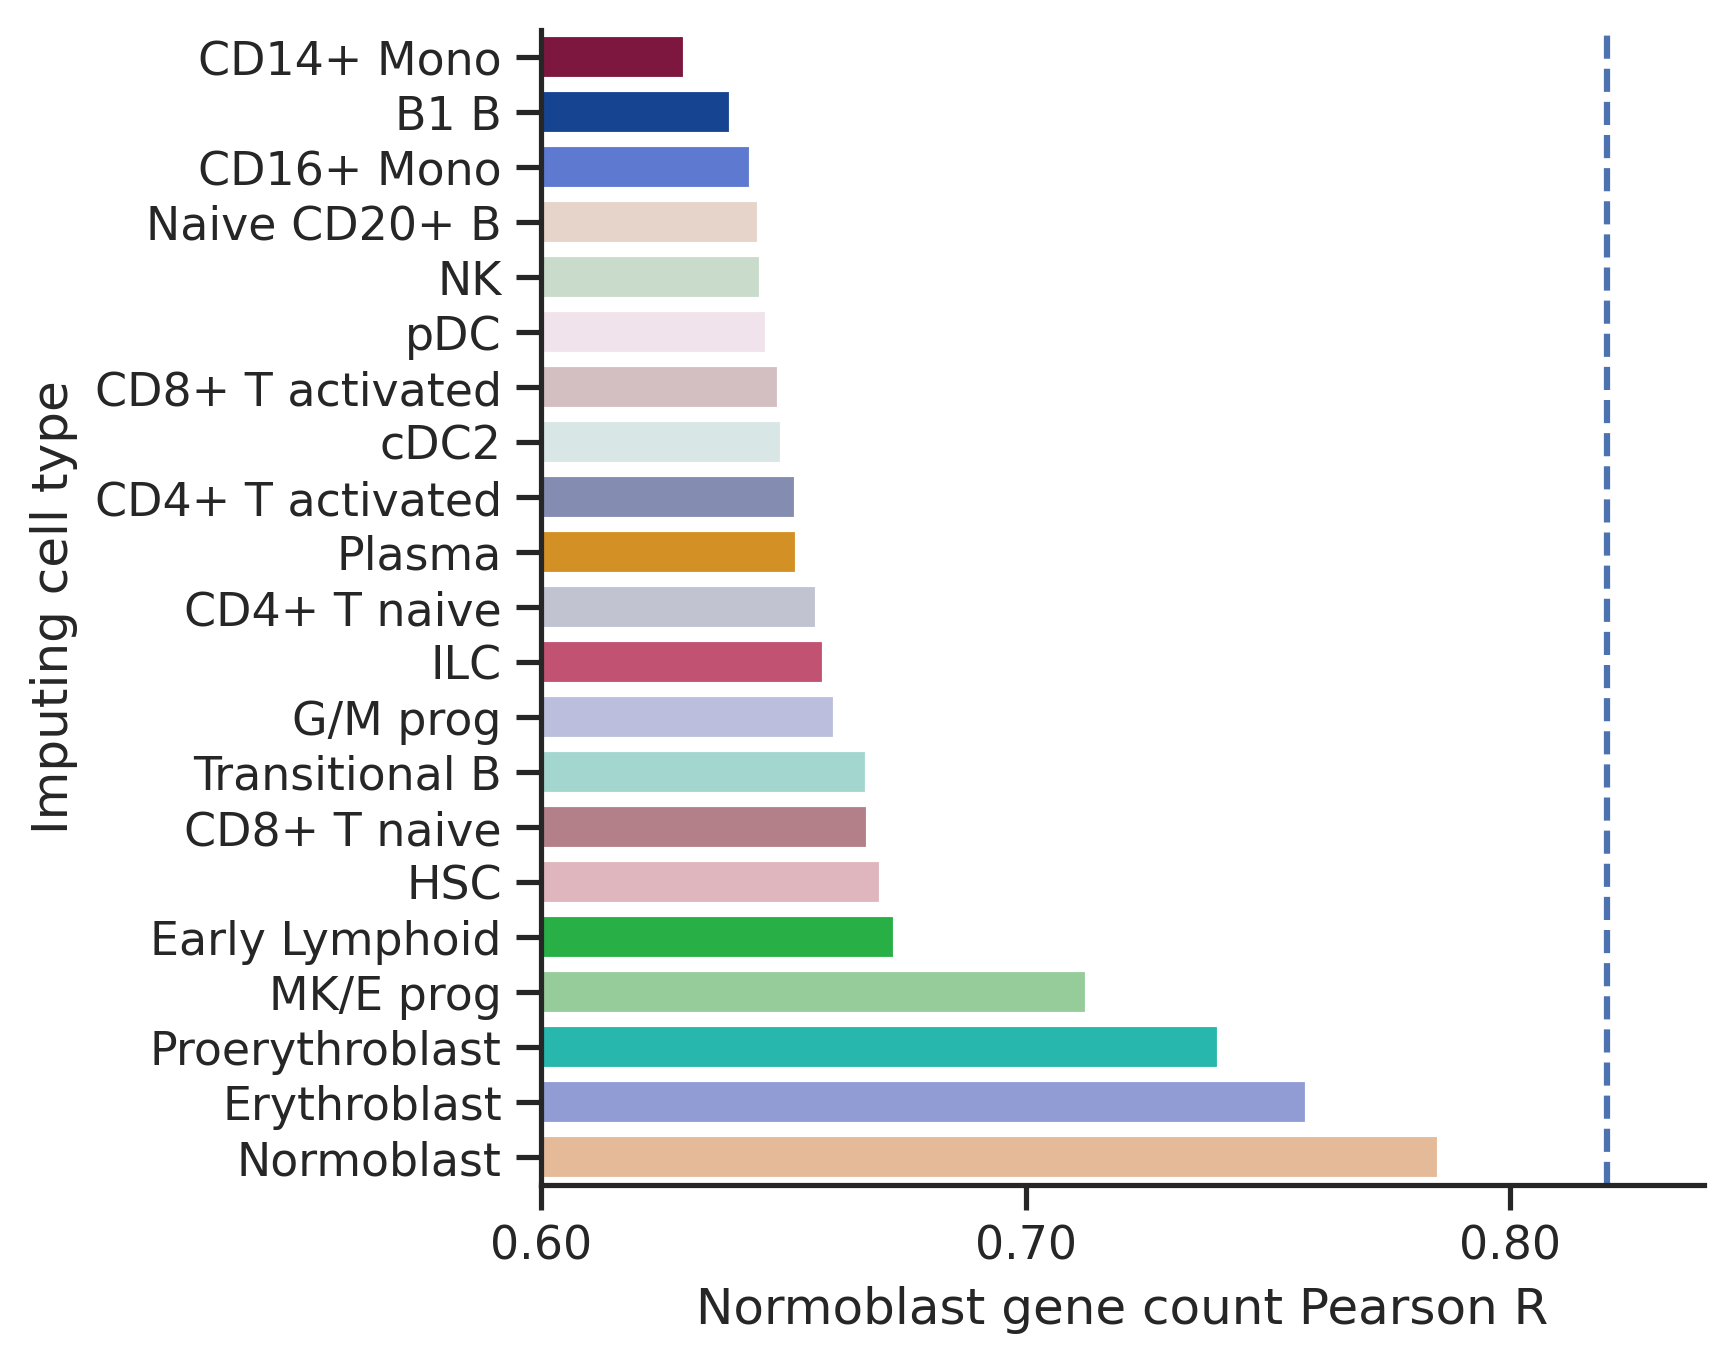

In [139]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
#sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(1,figsize=(5,5))
ax = sns.barplot(test.rename({"normoblast perf, pearson when_imputed with celltype pred" : "Val set: Normoblast count pearson, when imputed with cell type", "celltype" : "Cell type"}, axis = 1),y="Cell type",x="Val set: Normoblast count pearson, when imputed with cell type", palette = test['color'].values, ax= ax)
ax.set_xlabel("Normoblast gene count Pearson R")
ax.set_ylabel("Imputing cell type")
ax.figure.set_dpi(300)
ax.set_xlim(0.6,0.84)
xlabels = ['{:,.2f}'.format(x) for x in ax.get_xticks()[::2]]
ax.set_xticks([float(t) for t in xlabels], xlabels)
ax.axvline(0.82, linestyle='--')
# for label in ax.xaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
plt.savefig("../figures/Figure2/Fig2F.svg",bbox_inches="tight", dpi = 300)

### Plot lineages

In [6]:
ad_outputs = sc.read(os.path.join(data_path, 'count_eval', 'test_val_genes.h5ad'))
ad_outputs_norm = sc.read(os.path.join(data_path, 'count_eval', 'test_val_genes_no_normos_clean_emb.h5ad'))
ad_outputs.uns['l2_cell_type_colors'] = adata.uns['l2_cell_type_colors']
ad_outputs_norm.uns['l2_cell_type_colors'] = adata.uns['l2_cell_type_colors']
sc.pp.normalize_total(ad_outputs)
sc.pp.normalize_total(ad_outputs_norm)

In [7]:
ct_colors = pd.Series(adata.uns['l2_cell_type_colors'], 
                     index=adata.obs['l2_cell_type'].values.categories)

In [8]:
# Lineage cells 
meta_lineage_cells = pd.Series(dtype=object)
# Erytrocyte lineage
meta_lineage_cells['Erythroblast'] = adata.obs_names[adata.obs['l2_cell_type'].isin(
    ['MK/E prog', 'HSC', 'Proerythroblast', 'Erythroblast', 'Normoblast'])]

In [9]:
genes = [ "HEMGN"]

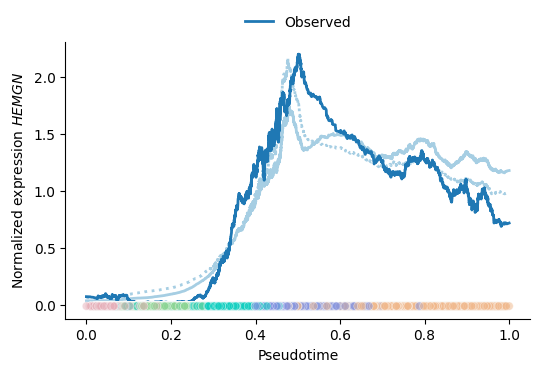

In [10]:
for i,gene in enumerate(genes):

    fig, ax_pred = plt.subplots(figsize=(3*2,1.8*2))
    ax_pred, sns_df = plot_cells_pseudotime(
        ad_outputs,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        #title=f"Predicted w Normoblast; Pearson R: {pcc}", 
        ax=ax_pred, 
        color = '#a6cee3', 
        ct_color=None,
        scale= True,
        plot_cells=False,
        splines=False,
        linewidth=2, 
    )
    ax_pred, sns_df_norm = plot_cells_pseudotime(
        ad_outputs_norm,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        # title=f"Predicted w/o Normoblast; Pearson R: {pcc_norm}", 
        ax=ax_pred, 
        color = '#a6cee3', 
        ct_color=None,
        scale= True,
        plot_cells=False,
        splines=False, 
        linewidth=2,
        linestyle=':'
        )
    ax_pred, sns_df_obs  = plot_cells_pseudotime(
        adata,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        title=f"Observed", 
        ax=ax_pred, 
        color = '#1f78b4', 
        ct_color=None,
        scale= True,
        plot_cells=True,
        splines=False, 
        linewidth=2
        )
    sns.despine(fig)
    sns.move_legend(
    ax_pred, "lower center",
    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
)
    ax_pred.set_xlabel("Pseudotime")
    ax_pred.set_ylabel(r"Normalized expression $HEMGN$")
    # ax_pred.set_yticks([0,1])
    #fig.savefig('figures/Figure2/no_normoblast_HEMGN.png', dpi=300, bbox_inches='tight')
    break

In [11]:
pcc = np.round(scipy.stats.pearsonr(sns_df['pred_y'], sns_df_obs['pred_y'])[0], 3)

In [12]:
pcc_norm = np.round(scipy.stats.pearsonr(sns_df_norm['pred_y'], sns_df_obs['pred_y'])[0], 3) 

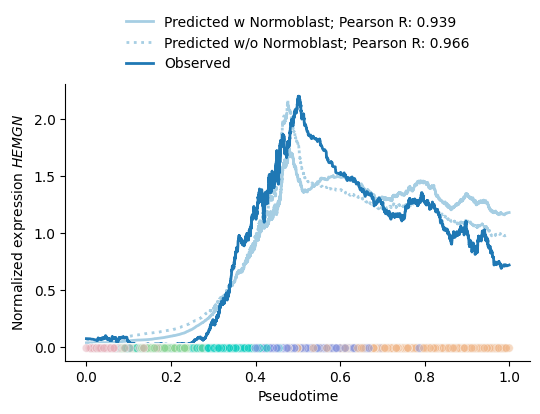

In [13]:
for i,gene in enumerate(genes):

    fig, ax_pred = plt.subplots(figsize=(3*2,1.8*2))
    ax_pred, sns_df = plot_cells_pseudotime(
        ad_outputs,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        title=f"Predicted w Normoblast; Pearson R: {pcc}", 
        ax=ax_pred, 
        color = '#a6cee3', 
        ct_color=None,
        scale= True,
        plot_cells=False,
        splines=False,
        linewidth=2, 
    )
    ax_pred, sns_df_norm = plot_cells_pseudotime(
        ad_outputs_norm,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        title=f"Predicted w/o Normoblast; Pearson R: {pcc_norm}", 
        ax=ax_pred, 
        color = '#a6cee3', 
        ct_color=None,
        scale= True,
        plot_cells=False,
        splines=False, 
        linewidth=2,
        linestyle=':'
        )
    ax_pred, sns_df_obs  = plot_cells_pseudotime(
        adata,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        title=f"Observed", 
        ax=ax_pred, 
        color = '#1f78b4', 
        ct_color=None,
        scale= True,
        plot_cells=True,
        splines=False, 
        linewidth=2
        )
    sns.despine(fig)
    sns.move_legend(
    ax_pred, "lower center",
    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
)
    ax_pred.set_xlabel("Pseudotime")
    ax_pred.set_ylabel(r"Normalized expression $HEMGN$")
    # ax_pred.set_yticks([0,1])
    fig.savefig('../figures/Figure2/no_normoblast_HEMGN.svg', dpi=600, bbox_inches='tight')
    break